# Practical works 9 & 10 : Face recognition by Eigenfaces method


**The objective of this practical work is to study the properties of the Eigenfaces face recognition method.**

We propose to develop a system capable of:
- identify a face from a database of faces 
- determine whether an image contains a face present in the database
- to decide whether an image represents a face or not

Tools developed in this practical work will be applied on the Yale Faces Database.

## General principle

The problem of face recognition is defined as follows: given a face image, one wishes to determine the identity of the corresponding person.
To this end, it is necessary to have reference images, in the form of a database of faces of all persons known by the system. 
Each face is associated to a vector of characteristics. 
These characteristics are supposed to be invariant for the same person, and different from one person to another one. 
Face recognition then consists in comparing the vector of characteristics of the face to be recognized with those of each of the faces of the database. 
This makes it possible to find the person in the database having the most similar face.

There are several types of methods, distinguished by the type of characteristics used, see _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces: A survey. Proceedings of the IEEE, 83(5), 1995_ for a state of the art:

- The approaches by face models proceed to a biometric analysis of faces. Pertinent biometrics are the distance between the eyes, length of the nose, shape of the chin...
- Image based approaches, by contrast, directly compare faces, considering them as images, for which measures of pre-attentive similarities (without a priori model) are defined.
- Hybrid approaches use the notions of similarity between images, but add a priori knowledge about the structure of a face.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: General Principle of a Face Recognition System</center>

## Analysis by Eigenfaces

Face recognition by Eigenfaces is an image-based approach. 
Each face image is considered as a vector in a space having as many dimensions as the number of pixels in the image. 
The image characteristics are extracted by a method of dimensionality reduction based on principal component analysis (PCA). 
This approach was originally proposed in 1991, see Mr. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71-86, 1991_.

In the following, we will use the italic notation to designate scalars ($m, K,\dots$) and vectors ($x, u$), and boldface  for the matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

A face image is noted $x$ and represented as a vector of $d$ components. $x[i] (i=0,\cdots,d-1)$ is the pixel number $i$ of this image. A set of faces form a cloud of points in the space $\mathbb{R}^d$. 
The database is divided into two sets: the *training* or *reference* set, used to learn the faces, and the *test* set, used to test the method. 
Faces of the training set are denoted by $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ and faces of the test set are denoted by $x_k^{test}$ $(k=0,\cdots,N_{test}-1) (k=0,\cdots,N_{test}-1)$.

We note $x_{average}$ the average of the reference faces, or average face. 
The principle of the Eigenfaces method is to model the difference of any face in relation to this average face by a linear combination of a limited number of images $u_h$, called Eigenfaces. 
One image of face $x \in \mathbb{R}^d$ is thus expressed as the average face to which is added a linear combination of eigenfaces:

$$x = x_{average} + \sum_h a_h u_h + \varepsilon$$

where $a_h$ represents the weight of *the eigenface* of index $h$ in the face $x$, and $\varepsilon$ represents the error between $x$ and its approximation by eigenfaces (error is due to the truncation of the basis of eigenvectors). 
Coefficients $a_h$ play a very important role for face recognition, because they correspond to the face coordinates $x$ in the face subspace.

The Eigenfaces method is based on the fact that the number of eigenfaces is much smaller than the total size of the space, which is called dimensionality reduction. In other words, the basis of eigenfaces is truncated, keeping only the vectors coding for the most significant information.
The images are therefore analyzed in a sub-space of reduced dimensions, which represents more specifically faces, among all possible types of images.

The average face is always the same for a fixed reference database, each face is examined after subtraction of the average face.

## Face database

We use the Yale Faces image database, http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html.
In this database, all the faces have been preprocessed, in order to resize and crop them to the size $64\times64$ pixels, so the images can be compared pixel per pixel.


This database contains 120 greyscale images, representing the faces of 15 people. There are 8 images per person, each corresponding to a category of images varying according to the following criteria (see Figure 2):
- variation of facial expression: normal, sad, sleepy, surprised,
    wink, happy
- variation of accessories: glasses, noglasses,

![database.png](./figs/Figure_2.png)
<center>Figure 2: Illustration of the shooting categories</center>

The database is divided into two groups: the reference group will be used as a training set, the other group as a test set: 
- the reference base contains $n$ images, each with a number of pixels $d=n_l\times n_c$. There are $6$ images per person in the training database, so $n=6\times15=90$. Each image is $64\times64$, hence $d=4096$, 
- the test base contains $2$ images per person so a total of 30 images. Each image is again $64\times64$.

In the following, we always manipulate face images in the form of vectors, and a set of faces in the form of a matrix where each column is a face. 
As we use Numpy, the images are stored in a multidimensionnal array of reals (double). 
This array is viewed as a matrix $\mathbf X$ of size $d\times n$: $$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$.

The matrix $\mathbf X$ is split into $\mathbf X^{train}$ and $\mathbf X^{test}$ of size $d\times N_{train}$ and $d\times N_{test}$, respectively.

# Exercise 1: loading the database, display and centering of faces

Vectors $id$ and $cat$ give information about the images: $id[k]$ and $cat[k]$ are respectively the identification (an index) and the cagetory of face $k$. These vectors are available for the reference and the test bases and will be useful in the following.

To load the database, we simply have to read the Matlab file `YaleFaces.mat` provided with this notebook: it provides the matrices and vectors $\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

The following code loads the database and creates the various matrices and vectors: 

In [95]:
##### Useful libraries
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

## Loading YaleFaces database
import scipy.io

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

# The training set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# The test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Additional images that don't contain faces 
X_noface = yaleFaces['X_noface']

In [2]:
X_train.shape, cat_test.shape, id_train.shape

((4096, 90), (30,), (90,))

1.  Write a function that computes the average face $x_{moy}$. \
    Tip: use `mean` function from Numpy.

In [3]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    return X.mean(axis=1)
g = meanFaces(X_train)
g.shape

(4096,)

2.  Write a function that centers the faces. \
    Recall: center means subtract the average face.

In [4]:
def centeredFaces(X, g):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    return X - g.reshape(-1, 1)
Xc_train = centeredFaces(X_train, g)
Xc_train.shape

(4096, 90)

3. Write a function `deflat()` that takes as argument a face, represented as a vector of 4096 elements, and returns an image of size $64\times64$. \
   Important: the Yale Faces database has been created in Matlab, for which the matrices are organized column by column. It may be useful to transpose the matrix.


In [5]:
def deflat(V):
    """" Vector[4096] -> Array[64,64] """
    return np.rot90(V.reshape(64,64), k=3)

4. Display the average face, as well as a few faces with the associated centered faces. Here is an example of the expected result:
![Figure_3.png](./figs/Figure_3.png)
<center>Figure 3: average face and centering of the database</center>

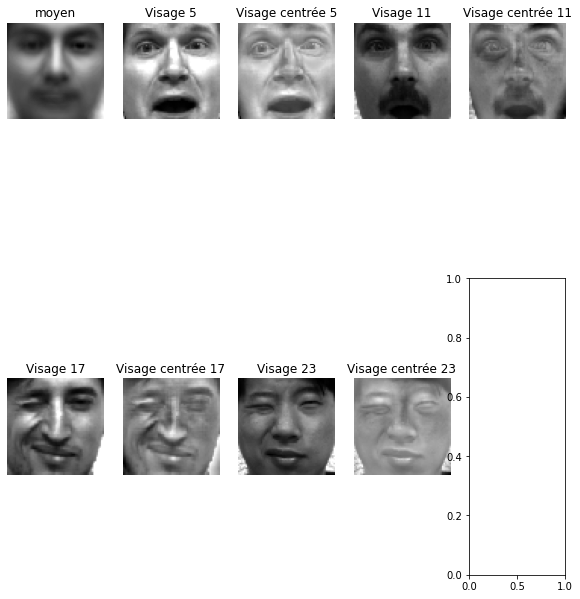

In [6]:
fig , ax = plt.subplots(2, 5, figsize=(10,12))
ax = ax.flatten()
ax[0].imshow(deflat(X_train.mean(axis=1)), cmap="gray")
ax[0].set_title('moyen')
ax[0].axis('off')
i = 0
for nb in [5, 11, 17, 23]:
    ax[i+1].imshow(deflat(X_train[:, nb]), cmap="gray")
    ax[i+1].set_title(f'Visage {nb}')
    ax[i+1].axis('off')

    ax[i+2].imshow(deflat(Xc_train[:, nb]), cmap="gray")
    ax[i+2].set_title(f'Visage centrée {nb}')
    ax[i+2].axis('off')
    i += 2

# Exercise 2: Computation of Eigenfaces (PCA)


The method developed by Turk and Pentland defines the eigenfaces as the main axes obtained by carrying out a principal component analysis (PCA) of the vectors associated with the reference faces. 
**The eigenfaces are thus the eigenvectors of the covariance matrix $\mathbf X_c\mathbf X_c^\top$**, of size $d\times d$ , where the matrix $\mathbf X_c$ of the same size as $\mathbf X$ represents all the centered faces:
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$
Each line of $\mathbf X_c$ corresponds to a pixel $p$, each column of $\mathbf X_c$ corresponds to a reference face of index $k$.

Rather than using eigenvalue decomposition, we will use singular value decomposition (SVD). 
The SVD decomposes the matrix $\mathbf X_c$ of size $d\times n$ into 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ such as :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

where $\mathbf U$ and $\mathbf V$ are orthogonal matrices ($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ and $\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$) of respective sizes $d\times d$ and $n\times n$, and $\mathbf S$ is a matrix of size $d\times n$ with null elements everywhere except on the main diagonal.

This decomposition has the following properties:
- the columns of $\mathbf V$ are the eigenvectors of $\mathbf X_c^\top\mathbf X_c$, 
- the columns of $\mathbf U$ are the eigenvectors of $\mathbf X_c\mathbf X_c^\top$,
- the matrix $\mathbf S$ is diagonal. The diagonal represents the singular values of $\mathbf X_c$, equal to the square roots of the eigenvalues $\lambda_k$ of $\mathbf X_c^\top\mathbf X_c$ and
    $\mathbf X_c\mathbf X_c^\top$. 

With Numpy, the SVD can be calculated by this way:

`U, S, V = numpy.linalg.svd(Xc)`

In our case, $n<d$, and the eigenvalues $\lambda_k$ of $\mathbf X_c\mathbf X_c^\top$ are therefore all null for $k>n$.
We will not need the associated eigenvectors $k>n$. 
The `svd` function has a fast mode, which calculates only the eigenvectors corresponding to the columns of the matrix passed as argument:

`U, S, V = svd(Xc, full_matrices=False)`


This command returns the matrices $\mathbf U$ and $\mathbf V$, of size $d\times n$ and $n\times n$, and the matrix $\mathbf U$ matrix has been truncated, only the first $n$ columns are retained:
$$\mathbf U= \left[ u_1, \cdots, u_n\right]$$
Finally `S` is a vector of size $n$ and represents the diagonal matrix $\mathbf S$.

1. Write a function `eigenfaces(Xc)` which returns a t-uple consisting of the $\mathbf U$ matrix of eigenfaces, computed from a centered database $\mathbf X_c$, and the table of associated eigenvalues.
        

In [7]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    # Sig = Xc @ Xc.T
    U, S, V = numpy.linalg.svd(Xc, full_matrices=False)
    return U, S

2. Use this function to calculate $\mathbf U$ and $\mathbf S$. Normalize then the eigenvalues so that their sum is equal to 1.


In [8]:
U, S = eigenfaces(Xc_train)
S *= S
norm_S = S / S.sum()

In [9]:
assert (np.sort(S) == np.flip(S)).all()

Les valeurs propres sont bien triées

3. Display the average face and the first 15 eigenfaces (see figure 4, use the `plt.subplot()` function).
   and their associated own values. Give your interpretation of the eigenfaces images?

![Figure_4.png](./figs/Figure_4.png)
<center>Figure 4: the 15 first eigenfaces</center>

In [10]:
U.shape

(4096, 90)

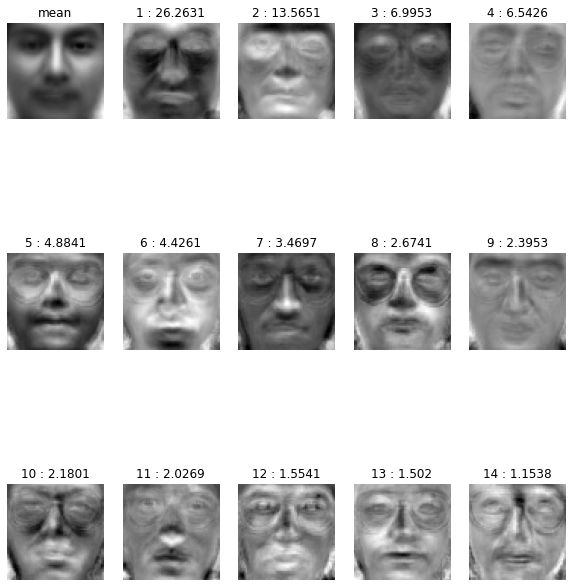

In [11]:
fig, ax = plt.subplots(3, 5, figsize=(10,12))
ax = ax.flatten()
ax[0].imshow(deflat(meanFaces(X_train)), cmap='gray')
ax[0].set_title(f"mean")
ax[0].axis('off')
for i in range(1, 15):
    eigface_img = deflat(U[:, i-1])
    eig_val = round(norm_S[i-1]*100, 4)
    ax[i].imshow(eigface_img, cmap='gray')
    ax[i].set_title(f"{i} : {eig_val}")
    ax[i].axis('off')

4. Plot the curve of the cumulative sum of the normalized eigenvalues (see Figure 5 for the expected result), to see how much variation is captured by the first $K$ eigenfaces. How many eigenfaces are needed to obtain a good reconstruction?    
    
![Figure_5.png](./figs/Figure_5.png)
<center>Figure 5: cumulative sum of eigenvalues</center>

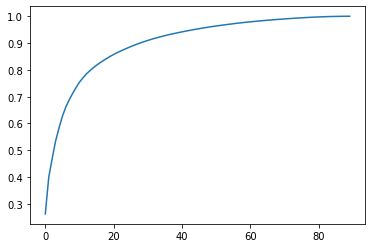

In [12]:
plt.plot(norm_S.cumsum())

# Exercise 3: projection in the subspace of faces


In the following, we use a reduced number of eigenfaces/eigenvectors. The vectorial space of faces, $\mathbf W_K$, is spanned by the basis formed with the $K$ first eigenvectors:

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Note that the set of columns of $W_K$ is an orthonormal basis, so $\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

The **projection of a face image $x$ in the face subspace** is simply done by subtracting from $x$ the average face and applying the scalar product with each eigenvector. 
This gives the coordinates of the image $x$ in the subspace of faces, which is of dimension $K$.

Each face therefore has several representations:
-   the original image, a vector $x \in \mathbb{R}^n$
-   the coordinates of the projected image $z$ in the basis of eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (subspace of faces):
    $$z = \mathbf W_K^\top (x-x_{average})$$
-   its reconstruction in the original space $\mathbb{R}^n$,
    $\tilde{x}$:
    $$\tilde{x} = x_{average} + \sum_h a_h u_h = x_{moy} + \mathbf W_K  z$$

**The reconstruction error is defined** as the distance between a face $x$ and the associated reconstruction $\tilde x$:
$$E^{recons}(x) =\|x-\tilde{x}\|_2  = \sqrt{\sum_{p=1}^n \left( x(p) - \tilde{x}(p)\right) ^2}$$

1. Write a function `projEigenfaces()` which takes as arguments a face, $x$, the average face, $x_{average}$, the subspace of faces $\mathbf W$, the number of eigenfaces $K$, and  computes the coordinates of projected face $z$ in the subspace $\mathbf W_K$ of faces.    

In [13]:
def projEigenface(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    return W[:, :K+1].T @ (x - x_mean)

2.  Write a function `reconstruct()` which takes as arguments a projected face, $z$, the average face, $x_{average}$, and the truncated subspace of face, $W$ and $K$, and computes the coordinate of $x$ in the original space ($\mathbb{R}^n$).    

In [14]:
def reconstruct(z, x_mean, W, K):
    """Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    return x_mean + W[:, :K+1] @ z

3.  Write a function  `errorReconstruct()` which computes the recontruction error between $\tilde{x}$ and $x$.

In [15]:
def errorReconstruct(x_r, x):
    """Vector[d]*Vector[d] -> double """
    return np.linalg.norm(x - x_r)

4.  Write a function `affiche_Reconstruction()` which displays:
    - the original face $x$,
    - the reconstructed faces $x_r$ for various values of $K$ (for instance, $K =$ 5, 10, 25, 50, 90).

In [16]:
def affiche_reconstruction(x, x_moy, W, listK, title):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    fig, ax = plt.subplots(2, 3, figsize=(10, 12))
    assert len(listK)<6, 'Trop de K a show'
    ax = ax.flatten()
    ax[0].imshow(deflat(x), cmap='gray')
    ax[0].set_title(title)
    ax[0].axis('off')
    for i, K in enumerate(listK):
        z = projEigenface(x, x_moy, W, K)
        x_r = reconstruct(z, x_moy, W, K)
        x_r_img = deflat(x_r)
        err = errorReconstruct(x_r, x)
        ax[i+1].imshow(x_r_img, cmap='gray')
        ax[i+1].set_title(f"K={K}, error={round(err)}")
        ax[i+1].axis('off')

5.  Test the previous functions by displaying the projection/reconstruction result for several images (from the training and test bases). Figure 6 shows the result of the reconstruction for image 50 of the training base. For image 55 of the training base, what is the reconstruction error for $K=n=90$? Is the image identical to its reconstruction? Same question for image 17 of the test base.

![Figure_6.png](./figs/Figure_6.png)
<center>Figure 6: example of reconstruction for image number 50</center>

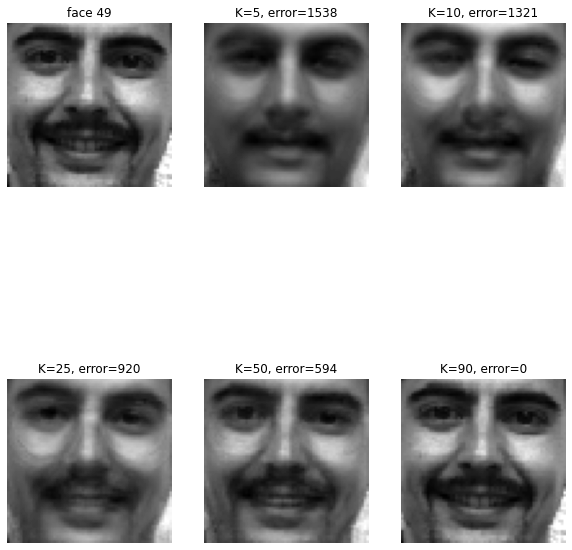

In [17]:
affiche_reconstruction(X_train[:, 49], meanFaces(X_train), U, [5, 10, 25, 50, 90], 'face 49')

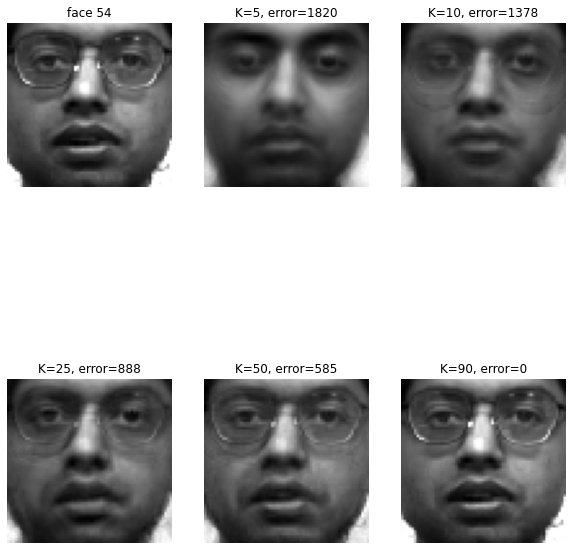

In [18]:
affiche_reconstruction(X_train[:, 54], meanFaces(X_train), U, [5, 10, 25, 50, 90], 'face 54')

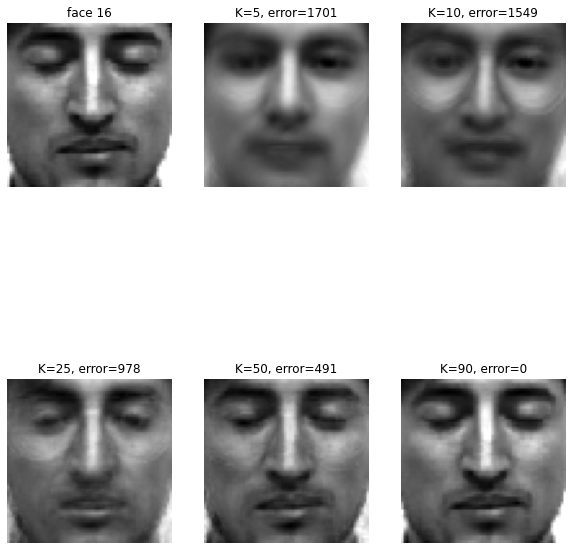

In [19]:
affiche_reconstruction(X_train[:, 16], meanFaces(X_train), U, [5, 10, 25, 50, 90], 'face 16')

**Comme on a pu voir dans le graphique de la somme cumulée des valeurs propre de l'exercice précédent, on peut voir la celle au début de la matrice diagonalisé explique beaucoup la variance alors que celle vers la fin de la matrice n'explique plus grand chose**

**Avec des grandes valeurs de $K$, l'erreur de reconstruction devient très petite et est arrondi à zéros**

6. Is there a difference between the reconstructions of the faces from the training base and those from the test base? Why?

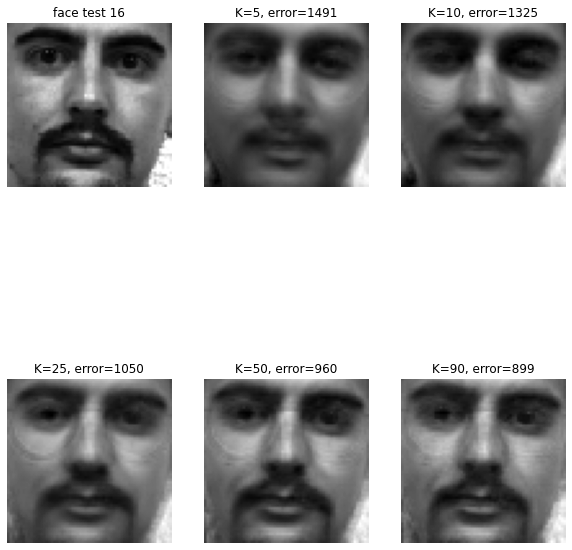

In [20]:
affiche_reconstruction(X_test[:, 16], meanFaces(X_test), U, [5, 10, 25, 50, 90], 'face test 16')

**Pour un même $K$ Il y a plus d'erreur sur le test car on utilise la matrice $U$ calculé précédement pour le train. Or c'est ci qui indique les dimensions de la variance les plus expressives pour le train et non pas les plus expressive pour le test.**

7. __Bonus question__: Plot the evolution of the average error of reconstruction of test faces when $K$ varies from 1 to $N$. Is this evolution consistent with the cumulative sum previously calculated (exercise 2, question 4)?

In [21]:
def eval_k(x, x_moy, W, maxK=90):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    err_list = []
    for K in range(maxK):
        z = projEigenface(x, x_moy, W, K)
        x_r = reconstruct(z, x_moy, W, K)
        err = errorReconstruct(x_r, x)
        err_list.append(err)
    return np.array(err_list)

In [22]:
from tqdm import tqdm
err_list = np.array(eval_k(X_test[:, 0], meanFaces(X_test), U, 90))
for i in tqdm(range(1, X_test.shape[1])):
    err_list = np.vstack((err_list, eval_k(X_test[:, i], meanFaces(X_test), U)))

100%|██████████| 29/29 [00:00<00:00, 48.54it/s]


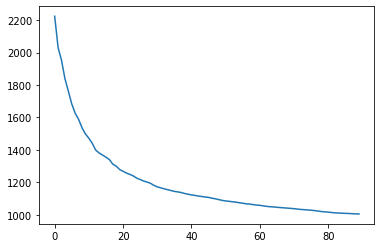

In [23]:
plt.plot(err_list.mean(0))

**En effet, on retrouve une courbe similaire à celle de l'exercice précédent. Les dernière valeurs propres apporte peu d'information pour mieux reconstruire l'image**

# Exercise 4: Face recognition and identification

Each reference face $x_k^{train}$ has an identity associated with it, in the form of a $id^{train}(k)$ number. In this section we try to identify a face $x^{test}$ from the reference faces.

The simplest method is to compare the projection $z^{test}$ of the test face $x^{test}$ with the projection $z_k^{train}$ of each reference image $x_k^{train}$ (see Figure 7). The dissimilarity between the two projected vectors is quantified by the distance in subspace $E_k(x^{test})$:

$$E_k(x^{test}) =\|z^{test}-z_k^{train}\|_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>Figure 7: Projection of an image $J$ in the subspace of faces and comparison with a reference face $I_k$, in case $K=2$.<center>

This distance is evaluated for each reference face, we can determine the reference face $x_k^{train}$ closest to the test face $x^{test}$. **Its identifier $id^{train}(k)$ then allows for the recognition of the tested face.**


1.  What is the advantage of calculating the distance $E_k(x^{test})$ in the subspace of faces rather than in the original space?

Your answer:

**L'espace $E_k$ est construit pour nous éviter ce qu'on appel la malédiction de la dimension. Ce terme inventé par Richard Bellman en 1961 indique la perte de sens des distances mathématique dans des espaces à haute dimension. Ici $E_k$ est construit pour ne garder qu'un nombre $K$ bien choisi de dimension, les plus expressives, et ainsi réduire le nombre de dimension. Ainsi on peut calculer la distance sans qu'elle soit très grande et sans sens.**

2.  Write a function ``computeMatDist()`` which takes as arguments the training set of centered faces, $\mathbf Xc_{train}$ of size $d\times N_{train}$, the test set of centered faces, $\mathbf Xc_{test}$ of size $d\times N_{test}$, the subspace of eigenfaces, $\mathbf W$ and $K$, and computes the matrix $D$ of distance between a face of the test set and a face of the training set. $D$ is of size $N_{test} \times N_{train}$.

In [24]:
def projEigenfaceCentered(x, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    return W[:, :K+1].T @ x

def calculMatDist(Xc_train, Xc_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n]"""
    n = Xc_train.shape[1]
    m = Xc_test.shape[1]
    D = np.empty((m, n))
    for i in range(m): # range test = row
        for j in range(n): # range train = columns
            z_test = projEigenfaceCentered(Xc_test[:, i], W, K)
            z_train = projEigenfaceCentered(Xc_train[:, j], W, K)
            D[i,j] = np.linalg.norm(z_test - z_train)
    return D

In [164]:
id_train

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14], dtype=uint8)

3.  Write a function `identification()` which takes as argument the matrix of distances $D$ (computed by the previous function), the vector of identification of the training set $id^{train}$, and returns the identificaton vector $\hat{id}^{test}$ of size $N_{test}$ of the elements of the test set.

In [26]:
def identification(D, id_train):
    """ Array[m,n]*Array[n] -> Array[m]"""
    y_hat = id_train[np.argmin(D, axis=1)]
    return y_hat

4. Compute for $K=30$ the identification rate by comparing $\hat{id}^{test}$ to $id^{test}$ labels. Then vary $K$, and plot the curve of the number of recognized faces as a function of $K$. Explain the shape of the curve obtained. Which value of $K$ can be taken to have a good recognition and a low calculation time?

In [27]:
Xc_train = centeredFaces(X_train, meanFaces(X_train))
Xc_test = centeredFaces(X_test, meanFaces(X_train))
D = calculMatDist(Xc_train, Xc_test, U, 30)
y_hat = identification(D, id_train)
np.where(id_test==y_hat, 1, 0).mean()

0.9

In [28]:
acc_list = []
for K in tqdm(range(90)):
    D = calculMatDist(Xc_train, Xc_test, U, K)
    y_hat = identification(D, id_train)
    acc_list.append(np.where(id_test==y_hat, 1, 0).mean())

100%|██████████| 90/90 [02:27<00:00,  1.64s/it]


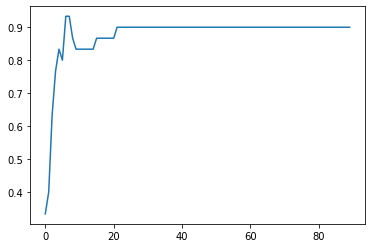

In [29]:
plt.plot(acc_list)

In [30]:
np.argmax(acc_list)

6

**Le meilleurs $K$ est 6**

5.  **Bonus question**: for $K=30$, calculate for each face of the training set its distance in the subspace $\mathbf W_K$ from each element of the training set. Display the result as the image of a matrix. Comment the result.

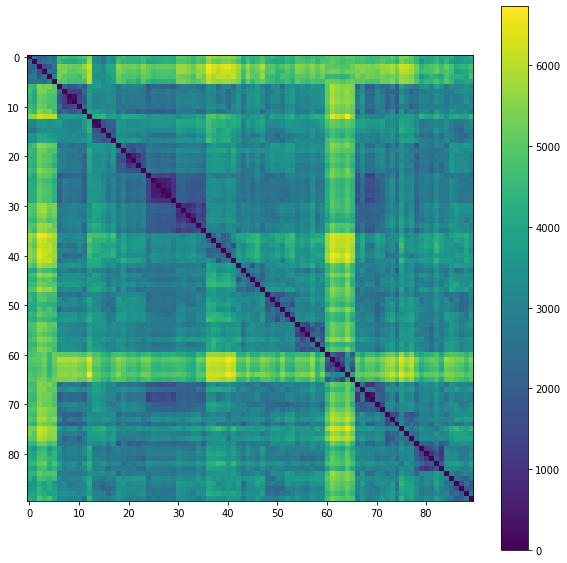

In [103]:
D = calculMatDist(Xc_train, Xc_train, U, 30)
plt.figure(figsize=(10, 10))
plt.imshow(D, interpolation='nearest')
plt.colorbar()

6. **Bonus question**: What are the minimal and maximal distances between two faces of the same category (i.e. same person)? Between two faces of different categories? If we want to choose a threshold $\theta$  to detect the presence of an unknown face, which indications do the previous min/max values give us?

### **Same face**

In [113]:
max_list = []
min_list = []
max_idx = []
for person in np.unique(id_train):
    person_index = np.nonzero(id_train==person)[0]
    person_D = D[person_index, :][:,  person_index]
    min_list.append(np.min(person_D, where=person_D != 0, initial=1e10)) # Evite le min avec lui même qui donne zéro
    max_list.append(np.max(person_D))
    max_idx.append(np.where(D == max_list[-1]))
    # display(max_list[-1])
    # plt.imshow(person_D)
    # plt.colorbar()
    # plt.show()
min(min_list), max(max_list)

(274.5154822297392, 4439.343570608828)

**Voici la distance min et max que l'on peut trouver entre deux faces de la même catégorie.**

In [116]:
np.argmax(max_list), max_idx[2], D[12,15]

(2, (array([12, 15]), array([15, 12])), 4439.343570608828)

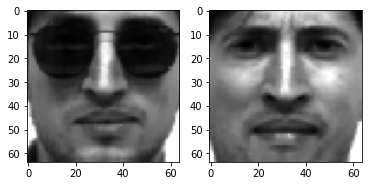

In [117]:
plt.subplot(1, 2, 1)
plt.imshow(deflat(X_train[:, 12]), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(deflat(X_train[:, 15]), cmap='gray')

**Voici les deux visages de la même catégorie ayant la distance la plus grande**

**C'est là qu'on voit l'importance de la distance entre les deux yeux dans la reconnaissance faciale**

### **Different face**

In [118]:
max_list = []
min_list = []
max_idx = []
for person in np.unique(id_train):
    person_index = np.nonzero(id_train!=person)[0]
    person_D = D[person_index, :][:,  person_index]
    min_list.append(np.min(person_D, where=person_D != 0, initial=1e10)) # Evite le min avec lui même qui donne zéro
    max_list.append(np.max(person_D))
    max_idx.append(np.where(D==max_list[-1]))
    # display(max_list[-1])
    # plt.imshow(person_D)
    # plt.colorbar()
    # plt.show()
min(min_list), max(max_list)

(274.5154822297392, 6730.961341575371)

In [121]:
np.argmax(max_list), max_idx[0], D[12,64]

(0, (array([12, 64]), array([64, 12])), 6730.961341575371)

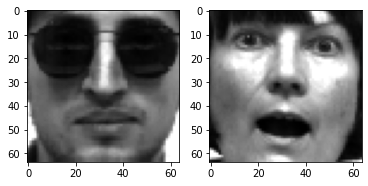

In [122]:
plt.subplot(1, 2, 1)
plt.imshow(deflat(X_train[:, 12]), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(deflat(X_train[:, 64]), cmap='gray')

**Voici la distance min et max que l'on peut trouver entre deux faces de catégorie différente.**

#### **Detection Visage inconnu**

**Un visage inconnu aura une distance supérieur à la distance max intraclasse par classe**

**Pour catégoriser un visage connus où un visage inconnus on fera simplement un `if err > theta`**

In [33]:
np.unique(id_train), np.unique(id_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=uint8),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=uint8))

Il faut re-mélanger tout pour isoler des visages inconnus

In [34]:
print(id_train)
print(id_test)

[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 14 14]


Par chance c'est dans l'ordre ihihih

In [35]:
X_train_unknown = X_train[:, :-30]
id_train_unknown = id_train[:-30] # Retire les visages [10:14]
Xc_train_unknown = centeredFaces(X_train_unknown, meanFaces(X_train_unknown))
U_unknown, _ = eigenfaces(Xc_train_unknown)

`U_unknown` a été train uniquement sur les visages numéroté de [0; 9]. Ainsi on vas pouvoir tester sur des visage inconnu en utilisant un $\theta$

In [36]:
id_test_unknown = [] 
for id in id_test:
    if id in [10,11,12,13,14]: 
        id_test_unknown.append(1) # 1 = visage inconnu, 0 = visage connu 
    else:
        id_test_unknown.append(0)
print(id_test_unknown)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


On vas donc vérifier si pour chaque visage du test si il appartient à une des classes à partir de la distance max intra-classe observé dans le train

In [181]:
D_unknown = calculMatDist(Xc_train_unknown, Xc_train_unknown, U_unknown, 30)
max_list = []
max_idx = []
for person in np.unique(id_train):
    person_index = np.nonzero(id_train==person)[0]
    person_D = D[person_index, :][:,  person_index]
    max_list.append(np.max(person_D))
    max_idx.append(np.where(D == max_list[-1]))
    # display(max_list[-1])
    # plt.imshow(person_D)
    # plt.colorbar()
    # plt.show()
theta = max_list
min(min_list), max(max_list)

(274.5154822297392, 4439.343570608828)

Au sein du train, la distance max entre deux visage 

In [152]:
Xc_train.shape

(4096, 90)

In [182]:
def belong_to_class(X_i_test, X_train_1class, U, K, theta_i):
    """Fait la distance """
    D = calculMatDist(X_train_1class, X_i_test.reshape(4096, 1), U, K) # Vecteur ligne 
    distance_max = D.max() # Distance max pour la classe i
    if distance_max < theta_i: # Est-ce qu'elle correspond au theta (max) de cette class ? 
        return 1 # Si oui, c'est possible que le visage appartienne bien à cette class
    else:
        return 0

def predict_one_sample(Xc_i_test, Xc_train, W, K, theta, id_train_unknown):
    for i, person in enumerate(np.unique(id_train_unknown)):
        person_index = np.nonzero(id_train_unknown==person)[0]
        Xc_train_1class = Xc_train[:, person_index]
        belong = belong_to_class(Xc_i_test, Xc_train_1class, W, K, theta[i])
        if belong == 1: # Si on trouve qu'il appartient potentiellement à une classe 
            return 0    # On arrête de chercher et return "visage connu"
    else:           # Si la boucle se termine : aucune classe correspondante n'a été trouvé
        return 1    # On renvoie visage connu

def predict(Xc_test, Xc_train, W, K, theta, id_train_unknown):
    y_hat = []
    for i in range(Xc_test.shape[1]):
        y_hat.append(
            predict_one_sample(Xc_test[:, i], Xc_train, W, K, theta, id_train_unknown)
        )
    return y_hat
y_hat = predict(Xc_test, Xc_train_unknown, U_unknown, 30, theta, id_train_unknown)
print(y_hat)
print(id_test_unknown)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [173]:
theta

[3057.1281880873926,
 2375.045842512778,
 4439.343570608828,
 2479.003272639569,
 1423.9071863830784,
 1795.5403108163723,
 3521.5859081351146,
 3187.793202152363,
 2665.056940290862,
 2870.776075349887,
 3926.21273499312,
 2590.710935777944,
 3166.6511286036985,
 2766.1821103462817,
 3110.5216440333047]

In [176]:
print(y_hat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### **J'ai essayé pas mal de chose en vain. Comparer par max intraclass par classe ou juste comparer sur un max global. Rien ne fonctionne tant pis 😭**

**Voir la fin pour l'implémentation d'un $\theta$ dans le cadre de la détection d'un visage ou non**

# Exercise 5: face/non-face classification

Until now, we focused on comparing facial images with each other. But the method provides information that we have not yet used. In particular, the reconstruction error can be used to verify that an image is indeed an image of a face. When an image contains something other than a face (image of a flower, a person seen in its entirety, a random image...), we can say that it is a non-face (database *noface*).

![figure8](./figs/Figure_8.png)
<center>Figure 8: illustration of possible cases for classifying an image: case 1,2) $Z$ close to subspace: it is a face 3,4) $Z$ far from subspace: it is not a face, 1) $Z$ is an identified face, case 2) $z$ is an unknown face, case 3) risk of identifying $Z$ as a face when it is not.

In [40]:
# The training set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# The test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Additional images that don't contain faces 
X_noface = yaleFaces['X_noface']

1.  With $K=30$, for each set, training set, test set, and *noface* set, plot the reconstruction error of all the images of each set (this provides 3 plots). Compute the minimal, average, maximal errors for the three sets. Which conclusion can be drawn?

In [41]:
def eval_set(x, x_moy, W, K, label):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    err_list = []
    for i in range(x.shape[1]):
        z = projEigenface(x[:, i], x_moy, W, K)
        x_r = reconstruct(z, x_moy, W, K)
        err = errorReconstruct(x_r, x[:,i])
        err_list.append([err, label])
    return err_list

In [42]:
import pandas as pd
import seaborn as sns
err_train = eval_set(X_train, meanFaces(X_train), U, 30, "X_train")
err_test = eval_set(X_test, meanFaces(X_train), U, 30, "X_test")
err_noface = eval_set(X_noface, meanFaces(X_train), U, 30, "X_noface")

df = pd.DataFrame(
    err_train + err_test + err_noface,
    columns=['error','set']
)

<AxesSubplot: xlabel='set', ylabel='error'>

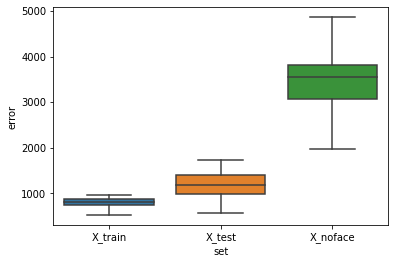

In [43]:
sns.boxplot(x='set', y='error', data=df)

**On peut voir que l'erreur sur les noface sont bien plus grande (et on aussi une variance plus forte) que le set de visage.**

**Dans le box plot, on peut voir que l'erreur maximale sur le test et l'erreur minimale sur le noface ne se croise pas (de justesse) et le tout sans outliers. Cela indique qu'on pourrait discrimer les deux groupes à partir de l'erreur.**

2. Visualize the reconstruction error by displaying the original image and the reconstructed image for 10 images of the face database, and for the 10 images of the noface database. Comment the results.

In [44]:
def affiche_reconstruction10(x, x_moy, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    fig, ax = plt.subplots(5, 4, figsize=(10, 12))
    ax = ax.flatten()
    for i in range(0, len(ax), 2):
        r = np.random.randint(0, x.shape[1])
        z = projEigenface(x[:, r], x_moy, W, K)
        x_r = reconstruct(z, x_moy, W, K)
        x_r_img = deflat(x_r)
        err = errorReconstruct(x_r, x[:, r])
        ax[i].imshow(deflat(x[:, r]), cmap='gray')
        ax[i].set_title(f"Original image")
        ax[i].axis('off')
        ax[i+1].imshow(x_r_img, cmap='gray')
        ax[i+1].set_title(f"error={round(err)}")
        ax[i+1].axis('off')

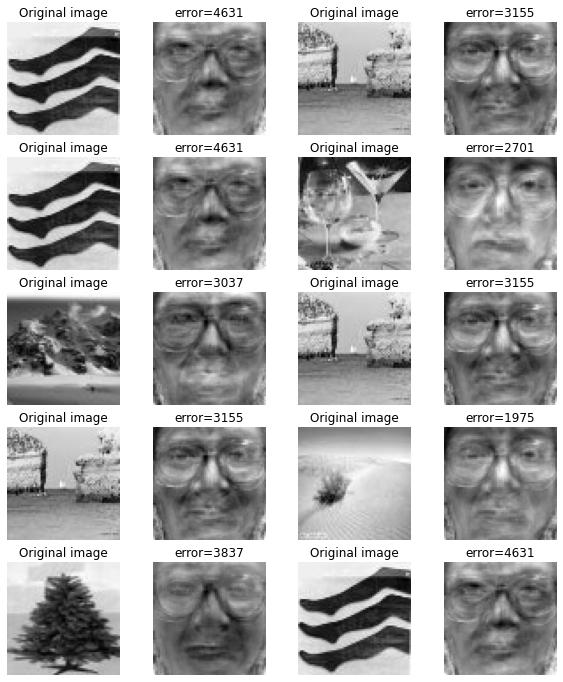

In [45]:
affiche_reconstruction10(X_noface, meanFaces(X_train), U, 30)

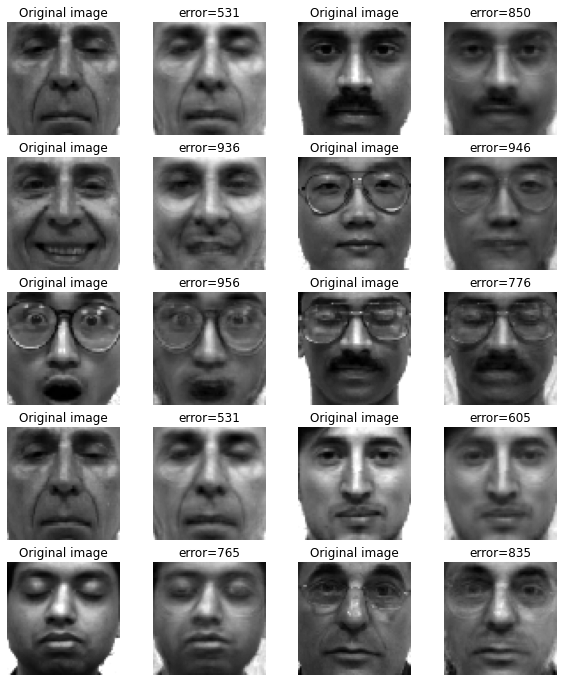

In [46]:
affiche_reconstruction10(X_train, meanFaces(X_train), U, 30)

**Dans le noface, on peut bien voir le recentrage sur la moyenne, on peut également parfois voir le reste de l'image d'origine en arrière plans.**

In [47]:
mean_face_train = meanFaces(X_train)

# Classification Visage/ Non visage
même si c'est très bateau et absolument pas adapté

## Import of more no face

In [48]:
import skimage, sklearn
def imread_convert(f):
    img = skimage.io.imread(f)
    resized_img = skimage.transform.resize(img, (64, 64))
    gray_r_img = skimage.color.rgb2gray(resized_img)
    return np.rot90(gray_r_img)
img_no_face = skimage.io.ImageCollection('./unsplash-images-collection/*.jpg', load_func=imread_convert).concatenate()
img_no_face = img_no_face.reshape((len(img_no_face), 64**2)).T
X_noface = np.hstack((yaleFaces['X_noface'], img_no_face))

<AxesSubplot: xlabel='set', ylabel='error'>

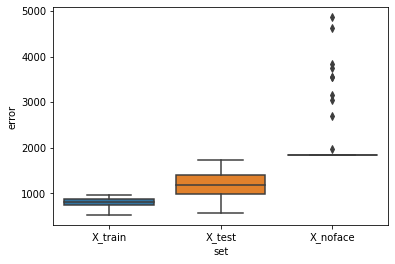

In [49]:
err_train = eval_set(X_train, meanFaces(X_train), U, 30, "X_train")
err_test = eval_set(X_test, meanFaces(X_train), U, 30, "X_test")
err_noface = eval_set(X_noface, meanFaces(X_train), U, 30, "X_noface")

df = pd.DataFrame(
    err_train + err_test + err_noface,
    columns=['error','set']
)
sns.boxplot(x='set', y='error', data=df)

**Beaucoup d'outlier, ce sont les images avec un background uni**

In [50]:
df.loc[df['set'] == "X_noface", 'error'].describe()

count      90.000000
mean     2025.706838
std       592.032386
min      1832.642320
25%      1838.616372
50%      1841.898664
75%      1844.901021
max      4858.690995
Name: error, dtype: float64

## Sets creation

In [51]:
from sklearn.model_selection import train_test_split

X = np.hstack((X_train, X_noface)).T
y = np.hstack((np.ones(X_train.shape[1]), np.zeros(X_noface.shape[1]))).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

Y = 
- 0 : non face
- 1 : face

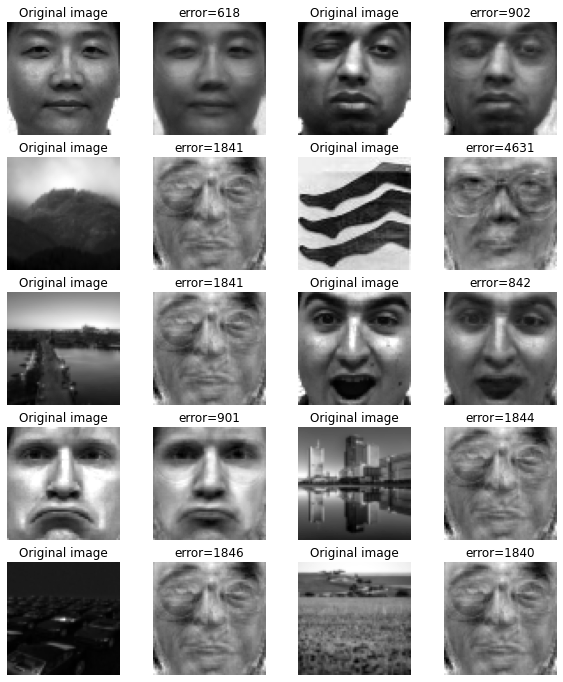

In [52]:
affiche_reconstruction10(X_train, mean_face_train, U, 30)

## Simple predict function

Let's try to use the max/min found before

In [53]:
K = 30

,error,label
0,1839.202385,0.0
1,3154.740050,0.0
2,1842.035599,0.0
3,763.653971,1.0
4,875.137538,1.0
...,...,...
115,839.512850,1.0
116,1840.922946,0.0
117,553.687752,1.0
118,4630.781654,0.0


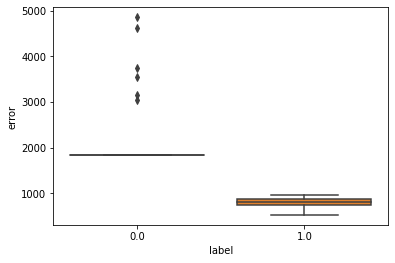

In [54]:
err_train = pd.DataFrame(eval_set(X_train, mean_face_train, U, K, "X_train"), columns=['error', 'label'])
err_train['label'] = y_train
sns.boxplot(x='label', y='error', data=err_train)
err_train

On retrouve la distinction entre visage et non visage. On vas set notre threshold $\theta$ à la moyenne entre le min et le max.

In [55]:
no_face_min = err_train.loc[err_train['label'] == 0, 'error'].min()
face_max = err_train.loc[err_train['label'] == 1, 'error'].max()
theta = (no_face_min + face_max)/2
theta

1395.2077915233497

In [56]:
def predict(X, U, theta, K=30): 
    err_list = eval_set(X, mean_face_train, U, K, "X_train")
    y_hat = []
    for err, _ in err_list:
        if err > theta:
            y_hat.append(0)
        else:
            y_hat.append(1)
    return y_hat

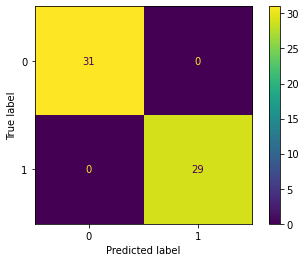

In [57]:
y_hat_test = predict(X_test, U, theta, K)
cfm = sklearn.metrics.confusion_matrix(y_test, y_hat_test)
sklearn.metrics.ConfusionMatrixDisplay(cfm).plot()

Plutôt pas mal 😂. J'allais faire varier $K$ mais bon c'est difficile de faire mieux.

Essayons quand même avec $K=6$. Ca permet tout de même de réduire les dimensions.

no_face_min 2498.107005140602
face_max 2408.9332429467713


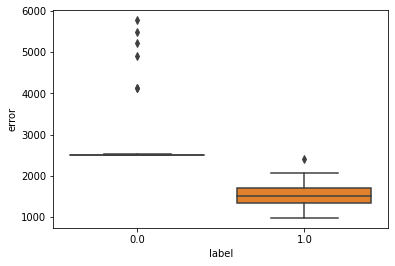

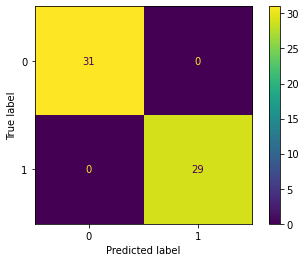

In [58]:
K = 6
err_train = pd.DataFrame(eval_set(X_train, mean_face_train, U, K, "X_train"), columns=['error', 'label'])
err_train['label'] = y_train
sns.boxplot(x='label', y='error', data=err_train)
no_face_min = err_train.loc[err_train['label'] == 0, 'error'].min()
face_max = err_train.loc[err_train['label'] == 1, 'error'].max()
print('no_face_min', no_face_min)
print('face_max', face_max)
theta = (no_face_min + face_max)/2

y_hat_test = predict(X_test, U, theta, K)
cfm = sklearn.metrics.confusion_matrix(y_test, y_hat_test)
sklearn.metrics.ConfusionMatrixDisplay(cfm).plot()


Cette fois-ci dans le set de train, la possibilité de distinguer les deux groupe par l'erreur de reconstruction se réduit. En effet le min des nofaces est proche du max des faces.

## LDA